Supervised Learning for House Project.

House Developer companies are interested in determining which factors are associated with house sale price. House Developer companies want to know whether Great Living area, Garage Area, Full Bath and Central Air-condition explaining the values of sale price and at the same time whether adding the variable Basement Area and other predictors might produce a significantly point for explaining sale price


Based on my studied and pattern evaluation below , I can now conclude that  predictors variables Central Air-condition ,Grade living area,  Garage Area, Full bathroom, Total Room above grade and Fireplaces are statistically associated with response Sale Price.  

In [ ]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [2]:
### The project is based on House price prediction 
df = pd.read_csv('C:/Users/xj614c/Documents/Data Sceince/house_price.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
#df.info()

In [4]:
## Select predictors and response variables
df1 = df[['LotFrontage','LotArea','Street','LotShape','Fireplaces','CentralAir','SaleCondition','PavedDrive','Neighborhood','SalePrice','GrLivArea','FullBath','BedroomAbvGr','TotRmsAbvGrd','GarageArea','WoodDeckSF']]

In [5]:
df1.head()

,LotFrontage,LotArea,Street,LotShape,Fireplaces,CentralAir,SaleCondition,PavedDrive,Neighborhood,SalePrice,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF
0,65.0,8450,Pave,Reg,0,Y,Normal,Y,CollgCr,208500,1710,2,3,8,548,0
1,80.0,9600,Pave,Reg,1,Y,Normal,Y,Veenker,181500,1262,2,3,6,460,298
2,68.0,11250,Pave,IR1,1,Y,Normal,Y,CollgCr,223500,1786,2,3,6,608,0
3,60.0,9550,Pave,IR1,1,Y,Abnorml,Y,Crawfor,140000,1717,1,3,7,642,0
4,84.0,14260,Pave,IR1,1,Y,Normal,Y,NoRidge,250000,2198,2,4,9,836,192


In [6]:
### Checking missing columns missing values 
print(df1.isnull().sum())

LotFrontage      259
LotArea            0
Street             0
LotShape           0
Fireplaces         0
CentralAir         0
SaleCondition      0
PavedDrive         0
Neighborhood       0
SalePrice          0
GrLivArea          0
FullBath           0
BedroomAbvGr       0
TotRmsAbvGrd       0
GarageArea         0
WoodDeckSF         0
dtype: int64


In [7]:
# Convert the Central Air Categorical binary values from Y or N to numeric value 1 or 0 values for analysis.
df1['CentralAir'] = df1['CentralAir'].map({'Y': 1, 'N': 0})

C:\Users\xj614c\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df1.corr()

,LotFrontage,LotArea,Fireplaces,CentralAir,SalePrice,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF
LotFrontage,1.000000,0.426095,0.266639,0.071659,0.351799,0.402797,0.198769,0.263170,0.352096,0.344997,0.088521
LotArea,0.426095,1.000000,0.271364,0.049755,0.263843,0.263116,0.126031,0.119690,0.190015,0.180403,0.171698
Fireplaces,0.266639,0.271364,1.000000,0.186309,0.466929,0.461679,0.243671,0.107570,0.326114,0.269141,0.200019
CentralAir,0.071659,0.049755,0.186309,1.000000,0.251328,0.093666,0.109326,0.007872,0.034509,0.230741,0.145973
SalePrice,0.351799,0.263843,0.466929,0.251328,1.000000,0.708624,0.560664,0.168213,0.533723,0.623431,0.324413
GrLivArea,0.402797,0.263116,0.461679,0.093666,0.708624,1.000000,0.630012,0.521270,0.825489,0.468997,0.247433
FullBath,0.198769,0.126031,0.243671,0.109326,0.560664,0.630012,1.000000,0.363252,0.554784,0.405656,0.187703
BedroomAbvGr,0.263170,0.119690,0.107570,0.007872,0.168213,0.521270,0.363252,1.000000,0.676620,0.065253,0.046854
TotRmsAbvGrd,0.352096,0.190015,0.326114,0.034509,0.533723,0.825489,0.554784,0.676620,1.000000,0.337822,0.165984
GarageArea,0.344997,0.180403,0.269141,0.230741,0.623431,0.468997,0.405656,0.065253,0.337822,1.000000,0.224666


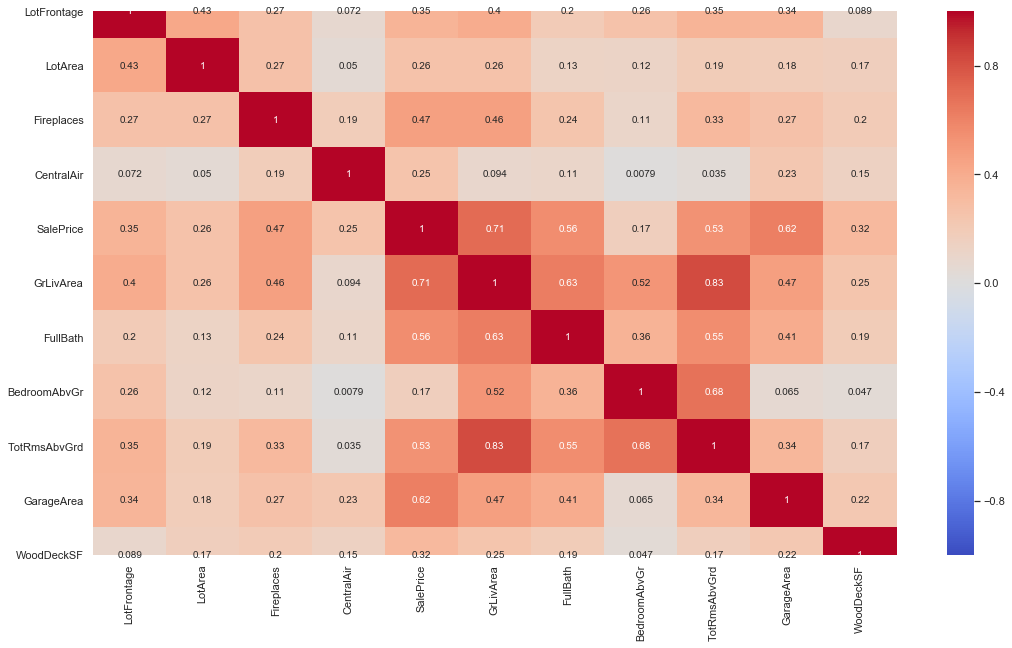

In [9]:
plt.figure(figsize=(18,10))
corr = df1.corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1,annot=True)

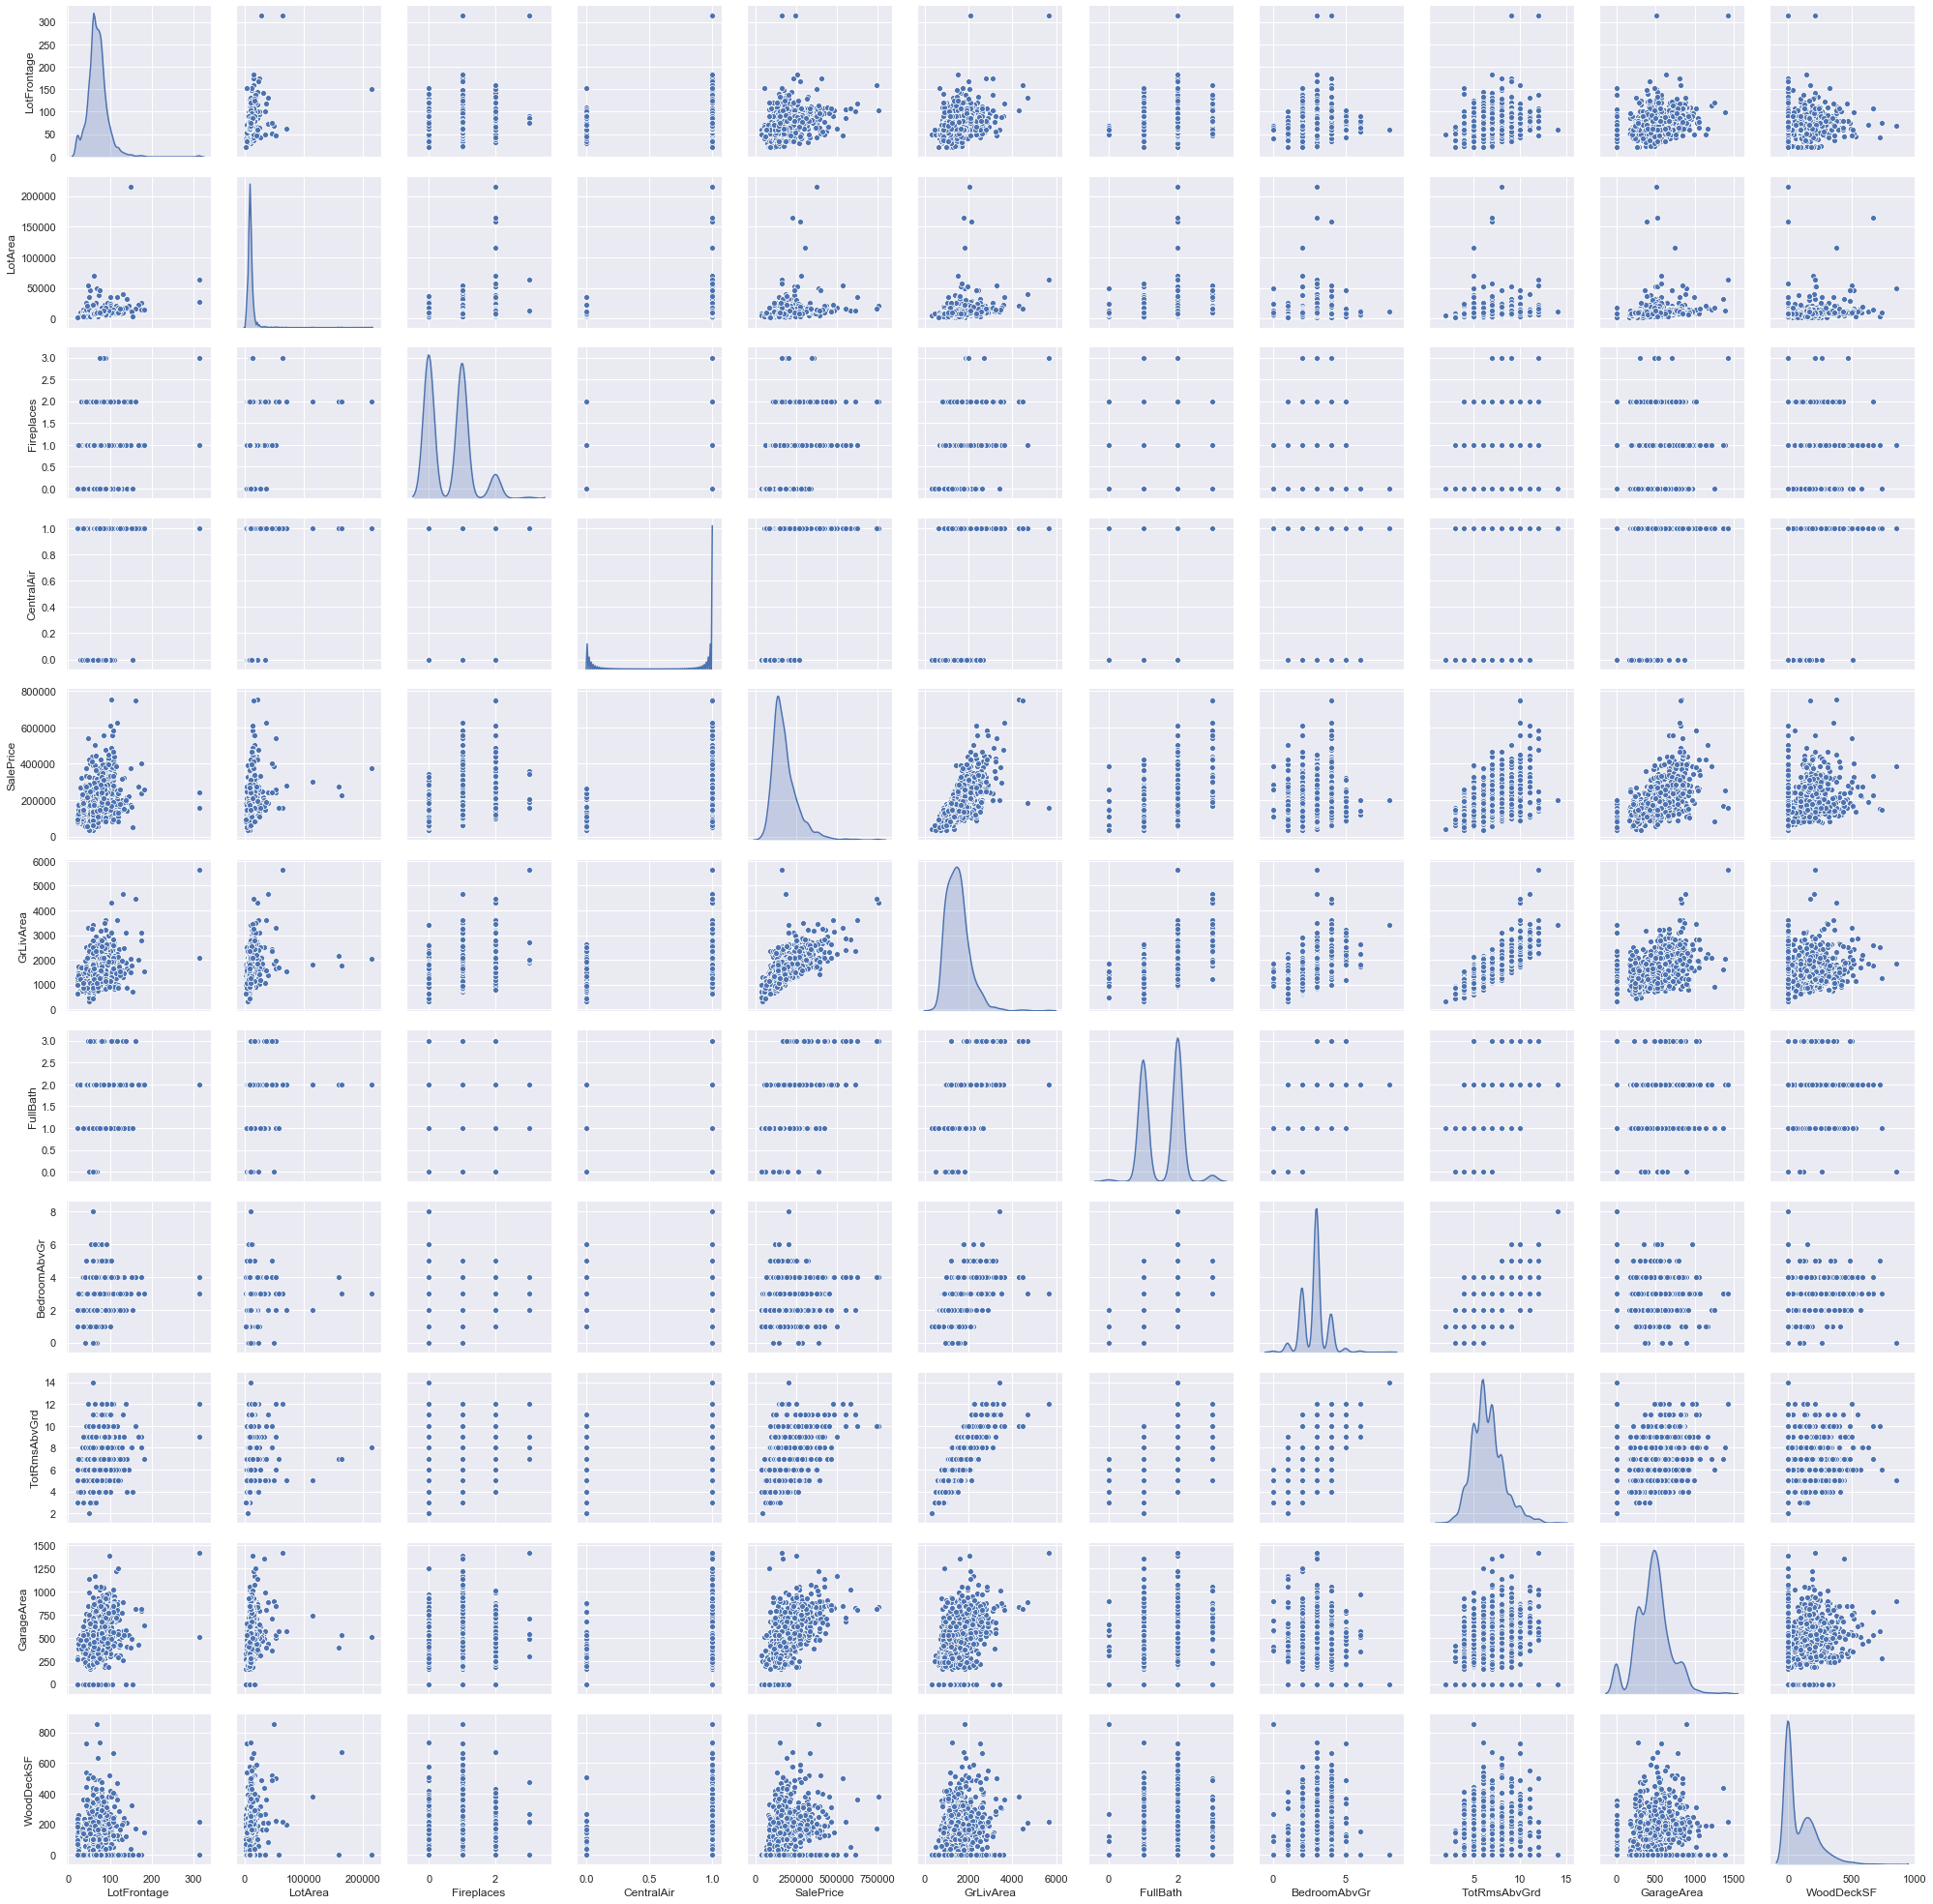

In [69]:
cols_to_plot =['LotFrontage','LotArea','Street','LotShape','Fireplaces','CentralAir','SaleCondition','PavedDrive','Neighborhood','SalePrice','GrLivArea','FullBath','BedroomAbvGr','TotRmsAbvGrd','GarageArea','WoodDeckSF']
sns.pairplot(df1[cols_to_plot], diag_kind='kde')

In [78]:
### Delete the missing column LotFrontage value from the dataset
df1.dropna(subset=['LotFrontage'], inplace=True)


C:\Users\xj614c\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [166]:
### Simple linear regression 
from sklearn.model_selection import train_test_split
## Split the dataset into 80% Training and 20% Test Date
X_train, X_test, = train_test_split(df1, test_size=0.2, random_state=0)
model = smf.ols("SalePrice ~ GrLivArea", data=X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1268.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.66e-188
Time:                        18:28:56   Log-Likelihood:                -14391.
No. Observations:                1168   AIC:                         2.879e+04
Df Residuals:                    1166   BIC:                         2.880e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.333e+04   4965.784      2.684      0.0

Text(0.5, 1.0, 'Scatter Plot of Grade living Area Ass. with Sale price')

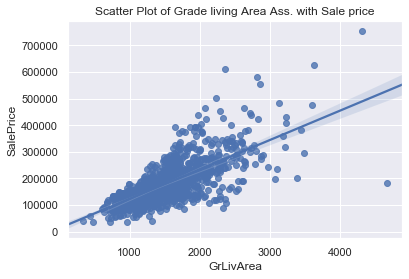

In [171]:
## Create a plot with the simple Linear Regreesion 
import seaborn as sns

sns.regplot(x = X_train['GrLivArea'], y = X_train['SalePrice'])
plt.title('Scatter Plot of Grade living Area Ass. with Sale price')

# Equivalent to:
#sns.regplot(x = "x", y = "y", data = df)

In [114]:
## Choose the best predictors and Build a multi-linear regression model. 
target_column = df1['SalePrice']
## Compute the correlation matrix
correlation_matrix = df1.corr()
# Step 2: Extract correlations with the target variable
correlations_with_target = correlation_matrix['SalePrice'].abs()
top_correlations = correlations_with_target.sort_values(ascending=False).head(6)[1:7]

# Display the top three correlated predictors
print(top_correlations)




GrLivArea       0.703557
GarageArea      0.631761
FullBath        0.566800
TotRmsAbvGrd    0.537215
Fireplaces      0.479353
Name: SalePrice, dtype: float64


In [122]:
## Build a Multi-Linear 
House = sm.add_constant(df1)

# your code here
house_model = smf.ols(formula='SalePrice ~ GrLivArea + GarageArea + FullBath + TotRmsAbvGrd + Fireplaces +CentralAir +WoodDeckSF', data=df1).fit()
print(house_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     337.7
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          9.96e-278
Time:                        14:05:32   Log-Likelihood:                -14657.
No. Observations:                1201   AIC:                         2.933e+04
Df Residuals:                    1193   BIC:                         2.937e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.825e+04   7889.364     

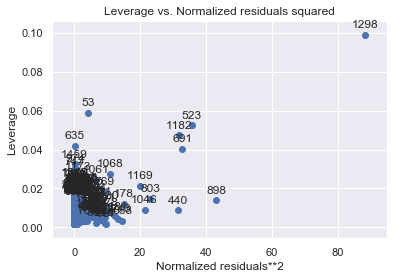

In [124]:
sm.graphics.plot_leverage_resid2(house_model)
plt.show()

# Get different Variables for diagnostic 
residuals = house_model.resid 
fitted_value = house_model.fittedvalues 
stand_resids = house_model.resid_pearson 
influence = house_model.get_influence() 
leverage = influence.hat_matrix_diag 

In [141]:
df2 = df1.drop([53,523,1182,1298,898,440,635,1046])[['GrLivArea' , 'GarageArea' ,'FullBath' ,'TotRmsAbvGrd' ,'Fireplaces' ,'CentralAir' ,'WoodDeckSF','SalePrice']]

In [172]:
house_model_1 = smf.ols(formula='SalePrice ~ GrLivArea + GarageArea + FullBath + TotRmsAbvGrd + Fireplaces +CentralAir +WoodDeckSF', data=df2).fit()
print(house_model_1.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     415.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.77e-313
Time:                        20:36:37   Log-Likelihood:                -14413.
No. Observations:                1193   AIC:                         2.884e+04
Df Residuals:                    1185   BIC:                         2.888e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.328e+04   7055.477     

In [143]:
## Multi-interation 
model_multi = smf.ols(formula='SalePrice ~ GrLivArea + GarageArea + FullBath + TotRmsAbvGrd + Fireplaces +CentralAir + FullBath:GarageArea +Fireplaces:GarageArea', data=df2).fit()
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     425.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:33:01   Log-Likelihood:                -14344.
No. Observations:                1193   AIC:                         2.871e+04
Df Residuals:                    1184   BIC:                         2.875e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.729e+

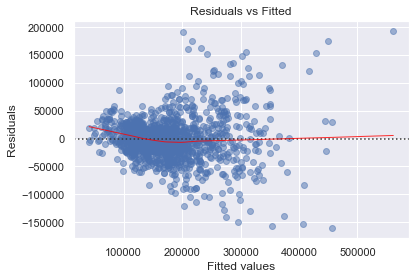

In [156]:
# model values
model_fitted_y = model_multi.fittedvalues
# model residuals
model_residuals = model_multi.resid
# normalized residuals
model_norm_residuals = model_multi.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_multi.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_multi.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, df2.columns[-1], data=df2,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');


In [144]:
### Performe Stepwise for the model. 
allowed_factors = ['GrLivArea' , 'GarageArea' ,'FullBath' ,'TotRmsAbvGrd' ,'Fireplaces' ,'CentralAir' ,'WoodDeckSF']

In [145]:
X_train, X_test, = train_test_split(df2, test_size=0.2, random_state=0)
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='SalePrice~'+p, data=X_train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

GrLivArea 0.5566339186458522
GarageArea 0.4097082674280662
FullBath 0.34058519163491263
TotRmsAbvGrd 0.3007787422939153
Fireplaces 0.2265823375904027
CentralAir 0.06495719167364333
WoodDeckSF 0.13872169016147606
best: ['GrLivArea', 0.5566339186458522]


In [151]:
# Manually test when k=1
House_Model1 = smf.ols(formula='SalePrice ~  GrLivArea ' , data=X_train).fit()
print(House_Model1.rsquared_adj)

0.5561681979721609


In [153]:
#Conduct the algorithm above for 𝑘=5
X_train, X_test, = train_test_split(df2, test_size=0.2, random_state=0)
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='SalePrice~ GrLivArea + GarageArea + FullBath + TotRmsAbvGrd + Fireplaces +'+p, data=X_train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)


GrLivArea 0.7030578680012018
GarageArea 0.7030578680012018
FullBath 0.7030578680012018
TotRmsAbvGrd 0.7030578680012018
Fireplaces 0.7030578680012018
CentralAir 0.7144468322322689
WoodDeckSF 0.7147361572789735
best: ['WoodDeckSF', 0.7147361572789735]


In [157]:
# Manually test when k=5
House_Model5 = smf.ols(formula='SalePrice ~  WoodDeckSF + CentralAir + Fireplaces + FullBath + GarageArea + GrLivArea' , data=X_train).fit()
print(House_Model5.rsquared_adj)
print(House_Model5.summary())

0.7158071074814637
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     401.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.65e-256
Time:                        15:35:24   Log-Likelihood:                -11545.
No. Observations:                 954   AIC:                         2.310e+04
Df Residuals:                     947   BIC:                         2.314e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.357e